#  An Objective Interpretation of Probability

Let's consider flipping a fair coin. Everyone agrees that the probability that coin will land on *Head* (*P(H)*) is equal to land on *Tail* (*P(T)*) = 0.5. So, can we say that exactly 10 out of every 20 times of flipping coin will land on either *head* or *tail*? Let's simulate this by using line of codes below:

- We ask numpy to generate random float number between 0 and 1 (from uniform distribution). We set 0.5 as the treshold so iff the random numbers generated is less than 0.5 then it simulate a coin land on *Head*
- Else it simulate a coin land on *Tail*

In [3]:
import numpy as np

n_repetitions = 20
H = 0
P_H = 0.5
T = 0
for _ in range(n_repetitions):
    toss = np.random.rand(1)
    if toss < P_H:
        H += 1
    else:
        T += 1
print(
    'After n = 10 repetitions, land on:'
    f'\n\t Head = {H}'
    f'\n\t Tail = {T}'
    )

After n = 10 repetitions, land on:
	 Head = 6
	 Tail = 14


So let's back at the concept of relative frequency. Consider an experiment that can be repeatedly performed in an identical and independent fashion (like our example of coin tossing). Let *A* be an event consisting of a fixed set of outcomes of the experiment (say our coin land on Head).  The relative frequency of occurence of event *A* is $n(A)/n$.

Turns out that this relative frequency will be stabilized as the number of repetitions *n* increased. As *n* gets arbitrarily large, $n(A)/n$ approaches a limiting value that referred as *long-run or limiting relative frequency*.

Let's back at our example above and let's see when we do a little bit more repetitions:

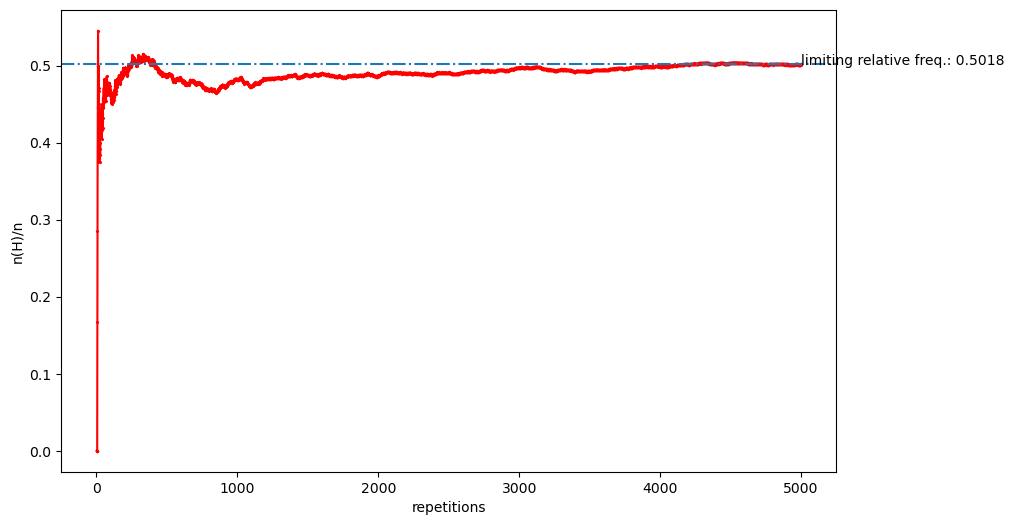

In [6]:
import matplotlib.pyplot as plt

n_repetitions = 5000
H = 0
P_H = 0.5
T = 0
reps = []
rel_freq_H = []
for i in range(n_repetitions):
    toss = np.random.rand(1)
    if toss <= P_H:
        H += 1
    else:
        T += 1
    reps.append(i + 1)
    rel_freq_H.append(H / reps[i])
# plot
fig, ax = plt.subplots(figsize=(10, 6))
limiting_freq = rel_freq_H[-1]
ax.scatter(
    x=reps, y=rel_freq_H, 
    marker='x', s=2, c='red'
    )
ax.plot(reps, rel_freq_H, c='red')
ax.axhline(y=limiting_freq, linestyle='-.')
ax.text(
    x=reps[-1], 
    y=rel_freq_H[-1], 
    s=f'limiting relative freq.: {limiting_freq}'
    )
ax.set_xlabel('repetitions')
ax.set_ylabel('n(H)/n')
plt.show()

Look at how the relative frequency on low number of repetitions: instability of the results of coin tosses which highly fluctuating near 0.5.

In conclusion, *objective interpretation of probability* identifies this limiting relative frequency with our *P(H) = 0.5*: roughly 50% times the coins will land on *head* in *large number of coin tosses*. This doesn't mean that exactly 10 out of every 20 will land on *Head*, because 20 is rather not a long run.

Because the objective interpretation of probability is based on the notion of limiting frequency, its applicability is limited to experimental situations that are repeatable. This is rather not appropriate for situations that are inherently repeatable: for example, *the probability we will win this tender is 90%*. This is rather a *subjective interpretation* because different observers may have different information and opinions concerning such situation.

### Simulation of Random Event: an example

Consider the following game: You’ll flip a coin 25 times, winning 1.5 dollars each time it
lands heads (H) and losing 1 dollars each time it lands tails (T). Unfortunately for you, the coin is biased in
such a way that $P(H) = .4$ and $P(T) = .6.$ What’s the probability you come out ahead; i.e., you have
more money at the end of the game than you had at the beginning? We’ll use simulation to find out.
Now each run of the simulation requires 25 “random” objects: the results of the 25 coin tosses.
What’s more, we need to keep track of how much money you have won or lost at the end of the 25
tosses. Let $A = \set{you\;come\;out\;ahead}$

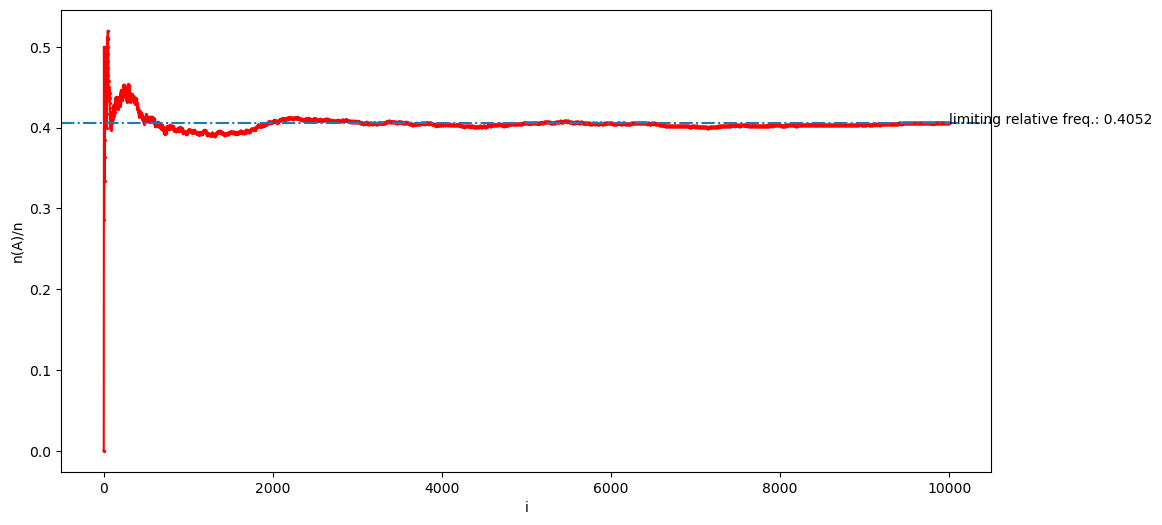

In [7]:
P_h = 0.4
n_toss = 25
A = 0 
reps = 10000
cum_freq = np.ndarray((reps, 2))
for rep in range(reps):
    bal_diff = 0
    for i in range(n_toss):
        toss = np.random.rand(1)
        if toss < P_h :
            bal_diff += 1.5
        else:
            bal_diff -= 1
    if bal_diff > 0:
        A += 1
    cum_freq[rep] = [(rep + 1), (A / (rep+1))]
# plotting limiting frequency
fig, ax = plt.subplots(figsize=(12, 6))
x=cum_freq[:, 0]
y=cum_freq[:, 1]
limiting_freq = cum_freq[-1, 1]
ax.scatter(
    x=x, y=y, 
    marker='x', s=2, c='red'
    )
ax.plot(x, y, c='red')
ax.axhline(y=limiting_freq, linestyle='-.')
ax.text(
    x=cum_freq[-1, 0], 
    y=cum_freq[-1, 1], 
    s=f'limiting relative freq.: {limiting_freq}'
    )
ax.set_xlabel('i')
ax.set_ylabel('n(A)/n')
plt.show()

In the short-term, your probability of winning more money can be fluctuative. But in the long run, you will have a lower chance of winning money than losing.

### Reference

This explanation is provided in *Modern Mathematical Statistics* by *Jay L. Devore*.